<h2> <p> Data gathering and Analysis via visualization

<h3> Importing Libraries

In [6]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd, lxml # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# import pgeocode
import json # library to handle JSON files
from bs4 import BeautifulSoup
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans
from urllib.request import urlopen
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import seaborn as sns

print('Libraries imported.')

Libraries imported.


<h3> 1. preparing new york dataframe from sourced json file

In [19]:
get_ipython().system("wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset")
print('Data downloaded!')

with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

neighborhoods_data = newyork_data['features']
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

neighborhoods.head()

Data downloaded!


,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


<h3> 2. Create a NY map highlighting all venues spots

In [20]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


<h3> 3. Since Queens has the maximum neighborhoods, i will use Queens for analysis purpose.

<function matplotlib.pyplot.show(*args, **kw)>

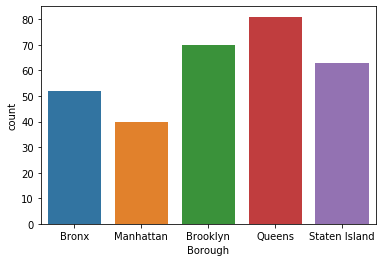

In [14]:
sns.countplot(x="Borough",data=neighborhoods)
plt.show

<h2> Now, Let's import , wrangle , visualize and Analyze data for Toronto .....

 
<h3> 4. Fetch "List of postal Codes, Borough and neighborhood" information from the <a href="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M">Link</a> and clean the data to create a dataframe with coordinates

In [8]:
# address = 'Queens, NY'
def findnth(string, substring, n):
    parts = string.split(substring, n + 1)
    if len(parts) <= n + 1:
        return -1
    return len(string) - len(parts[-1]) - len(substring)

In [14]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
html = urlopen(url)
body= BeautifulSoup(html,'lxml')

table= body.find_all("table")
df = pd.read_html(str(table))[0]
# print("Before Removing Not Assigned:",df.shape)

lst=[]
for idx,ele in df.iterrows():
    for x in ele.values:
        if x.find("Not assigned")==-1:
            lst.append(x)            
        else:
            continue
            
lst1=[]
lst2=[]
lst3=[]
print(len(lst))
df=pd.DataFrame()
for idx in range(len(lst)):
    lst1.append(lst[idx][:3])
    pos1=findnth(lst[idx],"(",0)
    pos2=findnth(lst[idx],"(",1)
    if pos1!=-1:
        lst2.append(lst[idx][pos1+1:pos2])
        lst3.append(lst[idx][3:pos1])
    else:
        lst2.append(lst[idx][3:])
        lst3.append("Not assigned")
    lst3


# print(lst3)
df.insert(0,"zip",lst1)
df.insert(1,"borough",lst3)
df.insert(2,"Neighborhood",lst2)
# lst1
df.head(5)

#Fetches Coordinates from csv file
df_data = pd.read_csv("Geospatial_Coordinates.csv")  

#Join the two dataframes
df_merged=df.set_index("zip").join(df_data.set_index("Postal Code")).reset_index()
df_merged.head()


103


,zip,borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636
3,M6A,North York,Lawrence Manor / Lawrence Heights,43.718518,-79.464763
4,M7A,Not assigned,Queen's Park / Ontario Provincial Government,43.662301,-79.389494


In [21]:
# !pip install lxml
# geopy bs4
# !pip install bs4
# !pip install geopy

<h3> 5. Let's visualize the Toronto Neighborhoods on the map....

In [17]:
address = 'Toronto Ontario, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto Ontario, CA are {}, {}.'.format(latitude, longitude))

# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['borough'], df_merged['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

The geograpical coordinate of Toronto Ontario, CA are 43.653963, -79.387207.


<h3> Data Visualization of Borough/County of Toronto Region...

<function matplotlib.pyplot.show(*args, **kw)>

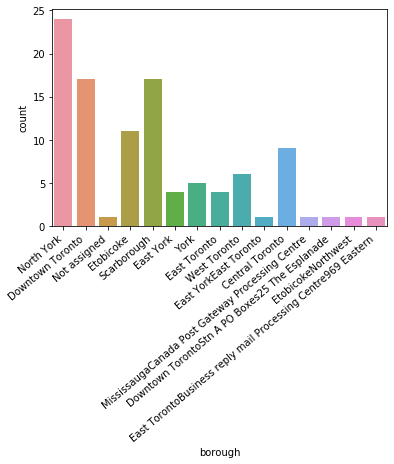

In [15]:
ax=sns.countplot(x="borough",data=df_merged)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show